In [7]:
import warnings
warnings.filterwarnings("ignore")
import sys
import os
sys.path.append(os.path.abspath("../"))
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
plt.style.use('ggplot')
from tqdm import tqdm
from synthdid.model import SynthDID
df = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/california_prop99.csv", delimiter=';')
df.head()


,State,Year,PacksPerCapita,treated
0,Alabama,1970,89.800003,0
1,Arkansas,1970,100.300003,0
2,Colorado,1970,124.800003,0
3,Connecticut,1970,120.000000,0
4,Delaware,1970,155.000000,0


In [8]:
data = df.pivot("Year", "State", "PacksPerCapita")
data.head().round()

State,Alabama,Arkansas,California,Colorado,Connecticut,Delaware,Georgia,Idaho,Illinois,Indiana,...,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1970,90.0,100.0,123.0,125.0,120.0,155.0,110.0,102.0,125.0,135.0,...,104.0,93.0,100.0,106.0,66.0,123.0,124.0,114.0,106.0,132.0
1971,95.0,104.0,121.0,126.0,118.0,161.0,116.0,108.0,126.0,139.0,...,115.0,97.0,106.0,109.0,68.0,124.0,128.0,112.0,105.0,132.0
1972,101.0,104.0,124.0,134.0,111.0,156.0,117.0,126.0,127.0,149.0,...,119.0,103.0,112.0,109.0,71.0,138.0,137.0,118.0,109.0,140.0
1973,103.0,108.0,124.0,138.0,109.0,155.0,120.0,122.0,124.0,156.0,...,126.0,104.0,110.0,110.0,73.0,147.0,143.0,117.0,110.0,141.0
1974,108.0,110.0,127.0,133.0,112.0,151.0,124.0,126.0,132.0,160.0,...,130.0,108.0,115.0,115.0,76.0,152.0,150.0,120.0,112.0,146.0


In [9]:
PRE_TEREM = [1970, 1988]
POST_TEREM = [1989, 2000]
TREATMENT = ["California"]
data.head()

State,Alabama,Arkansas,California,Colorado,Connecticut,Delaware,Georgia,Idaho,Illinois,Indiana,...,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1970,89.800003,100.300003,123.000000,124.800003,120.000000,155.000000,109.900002,102.400002,124.800003,134.600006,...,103.599998,92.699997,99.800003,106.400002,65.500000,122.599998,124.300003,114.500000,106.400002,132.199997
1971,95.400002,104.099998,121.000000,125.500000,117.599998,161.100006,115.699997,108.500000,125.599998,139.300003,...,115.000000,96.699997,106.300003,108.900002,67.699997,124.400002,128.399994,111.500000,105.400002,131.699997
1972,101.099998,103.900002,123.500000,134.300003,110.800003,156.300003,117.000000,126.099998,126.599998,149.199997,...,118.699997,103.000000,111.500000,108.599998,71.300003,138.000000,137.000000,117.500000,108.800003,140.000000
1973,102.900002,108.000000,124.400002,137.899994,109.300003,154.699997,119.800003,121.800003,124.400002,156.000000,...,125.500000,103.500000,109.699997,110.400002,72.699997,146.800003,143.100006,116.599998,109.500000,141.199997
1974,108.199997,109.699997,126.699997,132.800003,112.400002,151.300003,123.699997,125.599998,131.899994,159.600006,...,129.699997,108.400002,114.800003,114.699997,75.599998,151.800003,149.600006,119.900002,111.800003,145.800003


In [10]:
melt_df = pd.melt(
    data.reset_index().rename(columns={"index": "Year"}),
    id_vars="Year",
    value_name="PacksPerCapita",
    var_name="State",
)
melt_df["is_California"] = melt_df["State"] == "California"
melt_df

,Year,State,PacksPerCapita,is_California
0,1970,Alabama,89.800003,False
1,1971,Alabama,95.400002,False
2,1972,Alabama,101.099998,False
3,1973,Alabama,102.900002,False
4,1974,Alabama,108.199997,False
...,...,...,...,...
1204,1996,Wyoming,110.300003,False
1205,1997,Wyoming,108.800003,False
1206,1998,Wyoming,102.900002,False
1207,1999,Wyoming,104.800003,False


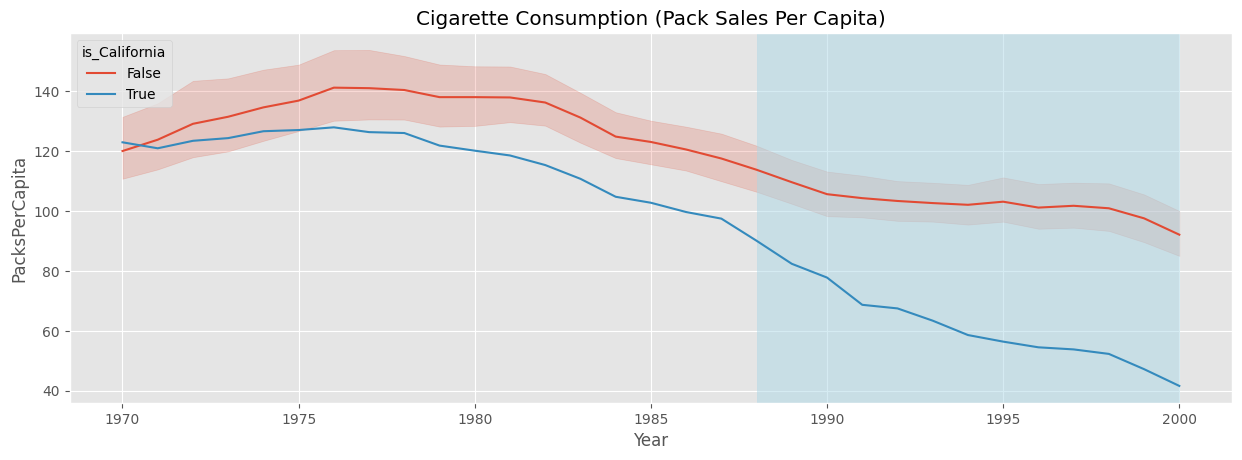

In [11]:
fig, ax = plt.subplots()
fig.set_figwidth(15)

sns.lineplot(x="Year", y="PacksPerCapita", hue="is_California", data=melt_df, ax=ax)

ax.axvspan(1988, 2000, alpha=0.5, color="lightblue")

plt.title("Cigarette Consumption (Pack Sales Per Capita)")
plt.show()

In [12]:
sdid = SynthDID(data, PRE_TEREM, POST_TEREM, TREATMENT)
sdid.fit(zeta_type="base")

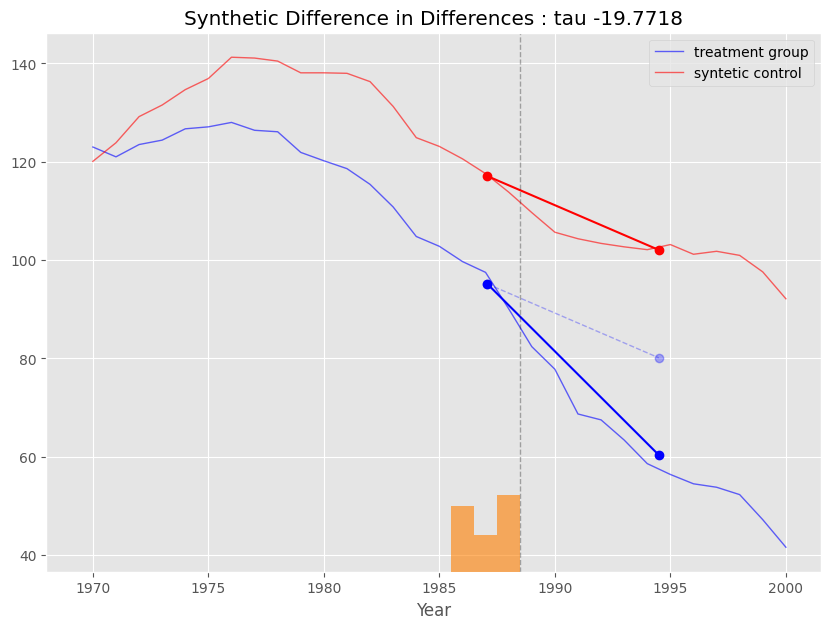

In [13]:
sdid.plot(model="sdid")

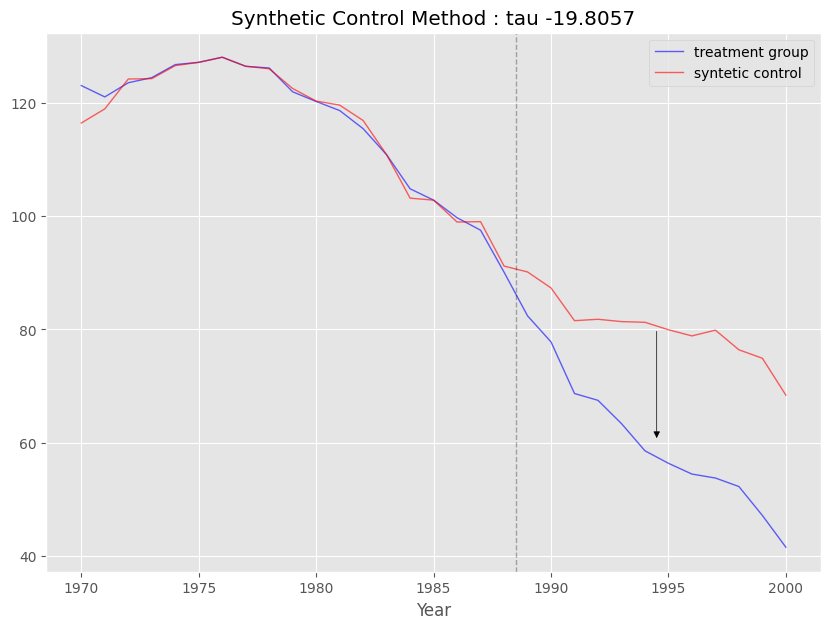

In [14]:
sdid.plot(model="sc")

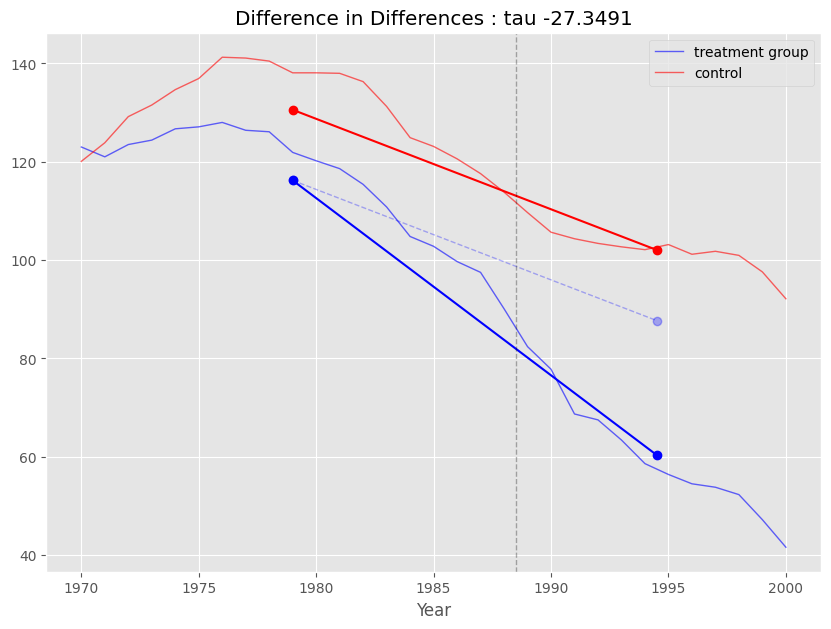

In [15]:
sdid.plot(model="did")